In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
df=pd.read_csv('/content/DF_CLEAN.csv')
df.shape

(7498, 11)

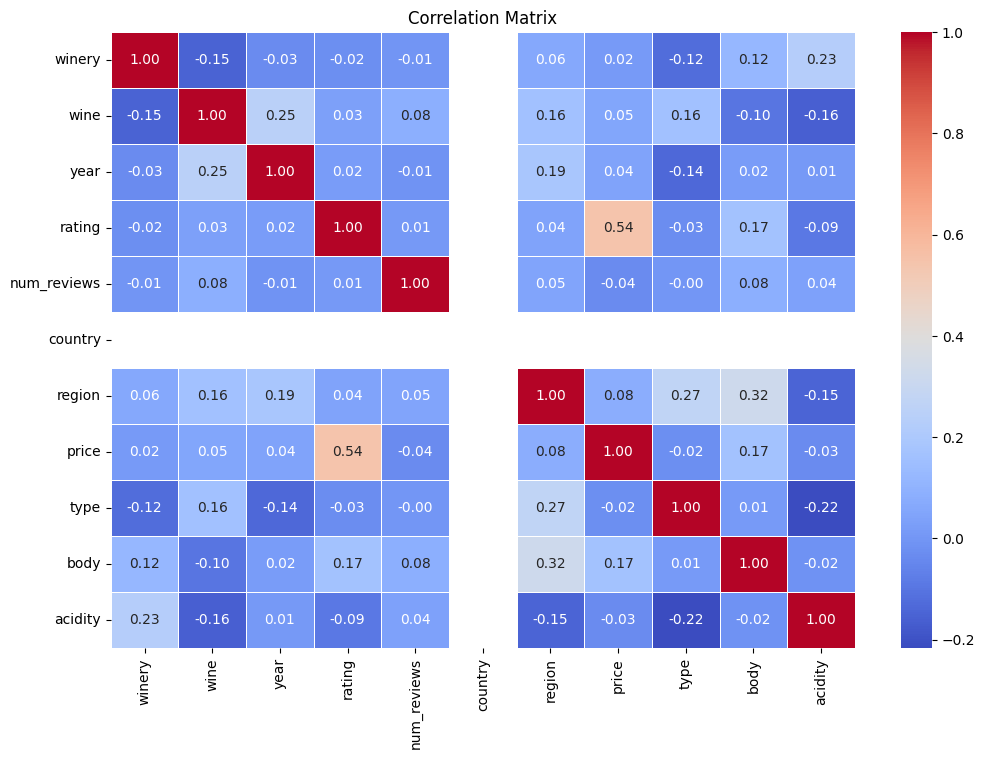

In [127]:
# Convert categorical variables into numeric form using Label Encoding
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
categorical_cols = df_encoded.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns
for col in categorical_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Compute correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

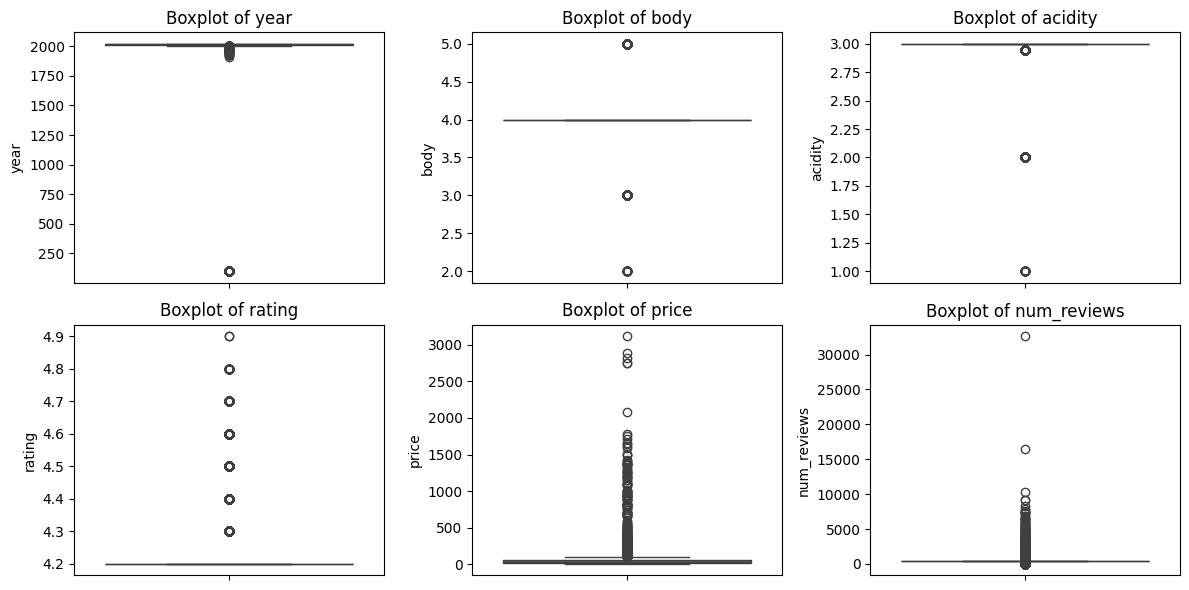

In [124]:
num_cols = ['year', 'body', 'acidity', 'rating', 'price', 'num_reviews']

# Plot boxplots
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [90]:
num_rows = df[df['price'] > 2500].shape[0]
display(num_rows)

5

In [91]:
df = df[df['price'] <= 2500]

In [92]:
num_rows = df[df['num_reviews'] > 15000].shape[0]
display(num_rows)

2

In [93]:
df = df[df['num_reviews'] <= 15000]

In [94]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None)  # Show full text in each column

for col in ['type', 'country', 'region']:  # Replace with your categorical columns
    print(f"Value counts for {col}:\n")
    print(df[col].value_counts(), "\n")


Value counts for type:

type
Rioja Red               2356
Ribera Del Duero Red    1405
Red                      862
Priorat Red              672
Toro Red                 295
Tempranillo              290
Sherry                   274
Albarino                 252
Mencia                   235
Rioja White               92
Pedro Ximenez             35
Grenache                  35
Cava                      33
Verdejo                   27
Monastrell                18
Montsant Red              17
Syrah                     15
Chardonnay                13
Cabernet Sauvignon        11
Sparkling                  5
Sauvignon Blanc            4
Name: count, dtype: int64 

Value counts for country:

country
Espana    7491
Name: count, dtype: int64 

Value counts for region:

region
Rioja                              2439
Ribera del Duero                   1411
Priorato                            684
Toro                                299
Vino de Espana                      261
Rias Baixas            

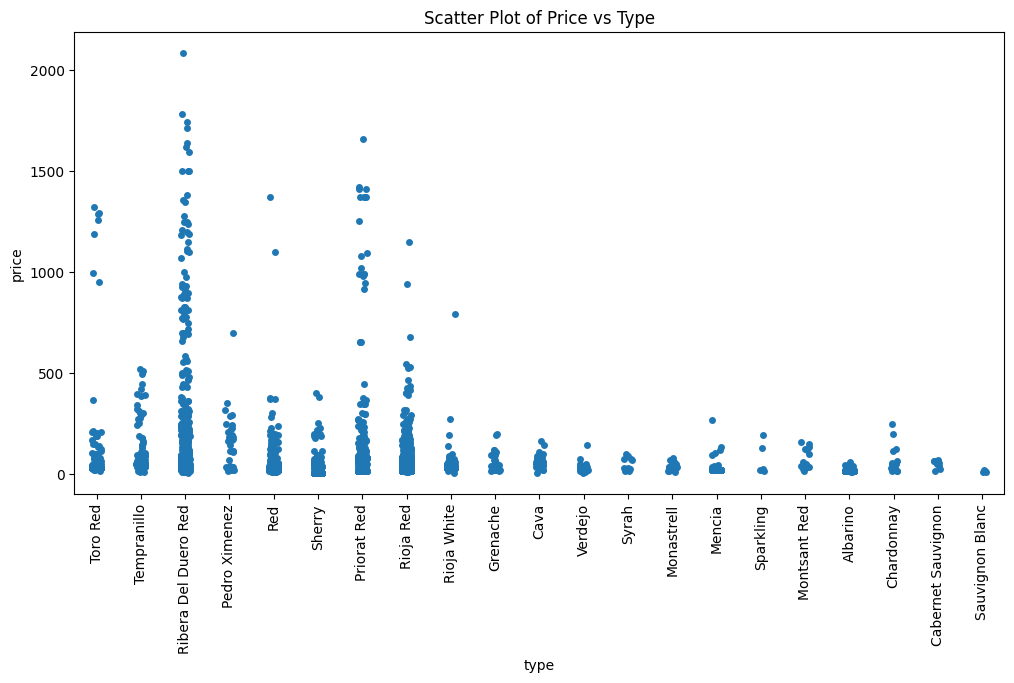

In [95]:
plt.figure(figsize=(12, 6))
sns.stripplot(x=df['type'], y=df['price'], jitter=True)
plt.xticks(rotation=90)
plt.title("Scatter Plot of Price vs Type")
plt.show()

In [96]:
filtered_rows = df[(df['type'] == 'Toro Red') & (df['price'] > 350)]
num_rows = filtered_rows.shape[0]
print(f"Number of rows: {num_rows}")

Number of rows: 8


In [97]:
df = df[~((df['type'] == 'Toro Red') & (df['price'] > 350))]

In [98]:
count_rows = df[(df['type'] == 'Pedro Ximenez') & (df['price'] > 500)].shape[0]
print(count_rows)

1


In [99]:
df = df[~((df['type'] == 'Pedro Ximenez') & (df['price'] > 500))]

In [100]:
count_rows = df[(df['type'] == 'Red') & (df['price'] > 1000)].shape[0]
print(count_rows)

2


In [101]:
df = df[~((df['type'] == 'Red') & (df['price'] > 1000))]

In [102]:
count_rows = df[(df['type'] == 'Rioja Red') & (df['price'] > 600)].shape[0]
print(count_rows)

3


In [103]:
df = df[~((df['type'] == 'Rioja Red') & (df['price'] > 600))]

In [104]:
df[df['type'] == 'Ribera Del Duero Red']['price'].describe()

,price
count,1405.000000
mean,107.252131
std,224.173532
min,7.900000
25%,34.500000
50%,51.350000
75%,64.500000
max,2087.250000


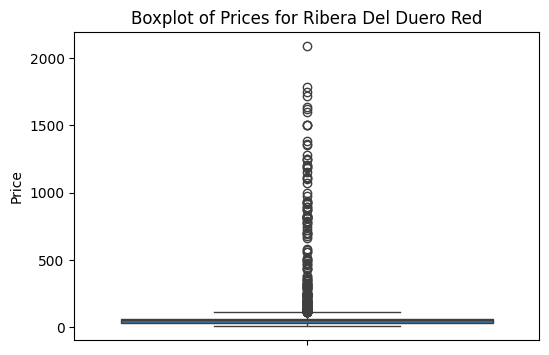

In [105]:
# Filtering data for 'Ribera Del Duero Red'
ribera_data = df[df['type'] == 'Ribera Del Duero Red']

# Create a boxplot
plt.figure(figsize=(6,4))
sns.boxplot(y=ribera_data['price'])
plt.title('Boxplot of Prices for Ribera Del Duero Red')
plt.ylabel('Price')
plt.show()

In [106]:
count_rows = df[(df['type'] == 'Ribera Del Duero Red') & (df['price'] > 109.5)].shape[0]
print(count_rows)


187


In [107]:
count_rows = df[(df['type'] == 'Ribera Del Duero Red') & (df['price'] > 1500)].shape[0]
print(count_rows)

8


In [108]:
df = df[~((df['type'] == 'Ribera Del Duero Red') & (df['price'] > 1400))]

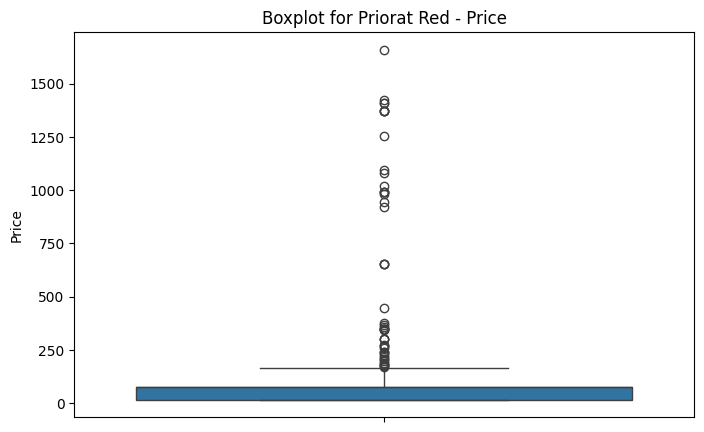

In [109]:
priorat_red_data = df[df['type'] == 'Priorat Red']

# Create the boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(y=priorat_red_data['price'])
plt.title('Boxplot for Priorat Red - Price')
plt.ylabel('Price')
plt.show()

In [110]:
count_rows = df[(df['type'] == 'Priorat Red') & (df['price'] > 500)].shape[0]
print(count_rows)

21


In [111]:
df = df[~((df['type'] == 'Priorat Red') & (df['price'] > 500))]


In [112]:
count_rows = df[(df['type'] == 'Sherry') & (df['price'] > 350)].shape[0]
print(count_rows)

2


In [113]:
df = df[~((df['type'] == 'Sherry') & (df['price'] > 350))]

In [114]:
count_rioja_white = df[(df['type'] == 'Rioja White') & (df['price'] > 600)].shape[0]
print("Rioja White above 600:", count_rioja_white)
df = df[~((df['type'] == 'Rioja White') & (df['price'] > 600))]

# Count and remove Mencia above 200
count_mencia = df[(df['type'] == 'Mencia') & (df['price'] > 200)].shape[0]
print("Mencia above 200:", count_mencia)
df = df[~((df['type'] == 'Mencia') & (df['price'] > 200))]

Rioja White above 600: 1
Mencia above 200: 1


In [115]:
low_count_types = ['Grenache', 'Cava', 'Verdejo', 'Monastrell', 'Montsant Red',
                   'Syrah', 'Chardonnay', 'Cabernet Sauvignon', 'Sparkling', 'Sauvignon Blanc']

# Apply grouping
df['type_grouped'] = df['type'].apply(lambda x: 'Other Wines' if x in low_count_types else x)

# Check the new grouping
print(df['type_grouped'].value_counts())

type_grouped
Rioja Red               2353
Ribera Del Duero Red    1395
Red                      860
Priorat Red              651
Tempranillo              290
Toro Red                 287
Sherry                   272
Albarino                 252
Mencia                   234
Other Wines              178
Rioja White               91
Pedro Ximenez             34
Name: count, dtype: int64


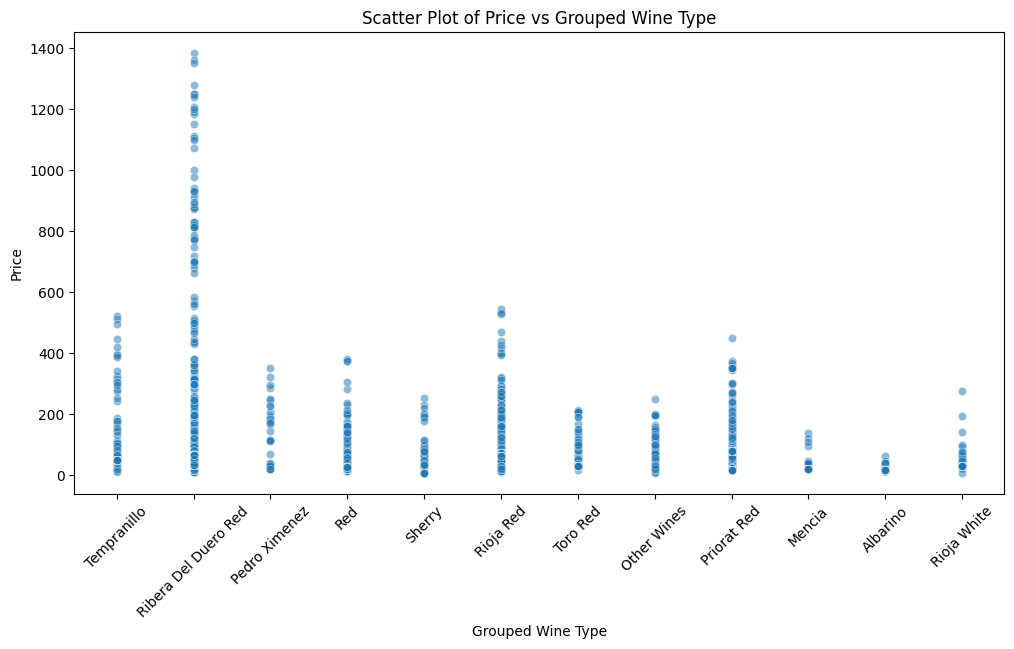

In [116]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='type_grouped', y='price', alpha=0.5)

plt.xticks(rotation=45)
plt.xlabel("Grouped Wine Type")
plt.ylabel("Price")
plt.title("Scatter Plot of Price vs Grouped Wine Type")
plt.show()

In [117]:
df.shape

(7442, 12)

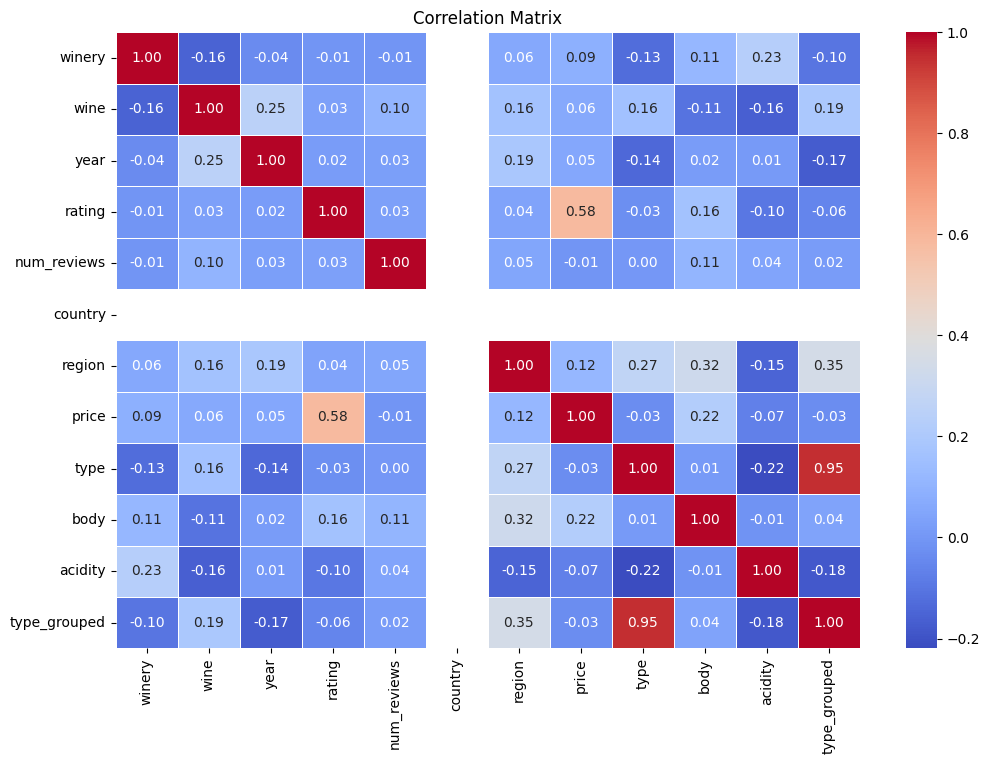

In [118]:
# Convert categorical variables into numeric form using Label Encoding
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
categorical_cols = df_encoded.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns
for col in categorical_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Compute correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()